In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weather_df = pd.read_csv("weather_raw.csv")
weather_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              1095 non-null   int64  
 1   month             1095 non-null   int64  
 2   date              1095 non-null   int64  
 3   name              1095 non-null   str    
 4   tempmax           1095 non-null   float64
 5   tempmin           1095 non-null   float64
 6   temp              1095 non-null   float64
 7   feelslikemax      1095 non-null   float64
 8   feelslikemin      1095 non-null   float64
 9   feelslike         1095 non-null   float64
 10  dew               1095 non-null   float64
 11  humidity          1095 non-null   float64
 12  precip            1095 non-null   float64
 13  precipprob        1095 non-null   int64  
 14  precipcover       1095 non-null   float64
 15  preciptype        423 non-null    str    
 16  snow              1095 non-null   float64
 17  snowde

In [2]:
# 남기고 싶은 열 리스트 (conditions 추가)
selected_cols = [
    'year', 'month', 'date', 'temp', 'humidity',
    'precip', 'snow', 'windspeed', 'winddir',
    'sealevelpressure', 'visibility', 'solarradiation',
    'conditions'
]

weather_df = weather_df[selected_cols]

weather_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              1095 non-null   int64  
 1   month             1095 non-null   int64  
 2   date              1095 non-null   int64  
 3   temp              1095 non-null   float64
 4   humidity          1095 non-null   float64
 5   precip            1095 non-null   float64
 6   snow              1095 non-null   float64
 7   windspeed         1095 non-null   float64
 8   winddir           1095 non-null   float64
 9   sealevelpressure  1095 non-null   float64
 10  visibility        1095 non-null   float64
 11  solarradiation    1095 non-null   float64
 12  conditions        1095 non-null   str    
dtypes: float64(9), int64(3), str(1)
memory usage: 111.3 KB


In [3]:
print(f"데이터 형태: {weather_df.shape}")
print("-" * 30)
print(weather_df.dtypes)
print("-" * 30)
# 각 변수별 결측치 및 전체 정보 확인
weather_df.info()

데이터 형태: (1095, 13)
------------------------------
year                  int64
month                 int64
date                  int64
temp                float64
humidity            float64
precip              float64
snow                float64
windspeed           float64
winddir             float64
sealevelpressure    float64
visibility          float64
solarradiation      float64
conditions              str
dtype: object
------------------------------
<class 'pandas.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              1095 non-null   int64  
 1   month             1095 non-null   int64  
 2   date              1095 non-null   int64  
 3   temp              1095 non-null   float64
 4   humidity          1095 non-null   float64
 5   precip            1095 non-null   float64
 6   snow              1095 non-null   float64
 7   windspeed        

In [4]:
# 수치형 데이터 요약 통계
display(weather_df.describe())

,year,month,date,temp,humidity,precip,snow,windspeed,winddir,sealevelpressure,visibility,solarradiation
count,1095.00000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,2018.00000,6.526027,15.720548,55.532968,60.792694,0.175884,0.002283,9.329772,233.453333,1016.667306,6.591598,177.345753
std,0.81687,3.449427,8.800266,19.509527,13.619902,0.566605,0.029380,3.439167,92.538041,8.270995,1.492278,77.584457
min,2017.00000,1.000000,1.000000,6.400000,20.300000,0.000000,0.000000,3.400000,3.700000,993.800000,1.300000,0.100000
25%,2017.00000,4.000000,8.000000,38.950000,50.700000,0.000000,0.000000,7.000000,197.650000,1010.200000,5.700000,119.950000
50%,2018.00000,7.000000,16.000000,57.800000,61.600000,0.000000,0.000000,8.700000,267.800000,1016.900000,7.000000,172.000000
75%,2019.00000,10.000000,23.000000,72.500000,70.100000,0.048000,0.000000,10.800000,300.250000,1023.200000,7.800000,239.350000
max,2019.00000,12.000000,31.000000,91.800000,93.400000,5.408000,0.700000,38.900000,359.200000,1037.800000,8.500000,334.800000


[컬럼별 결측치 확인]
year                0
month               0
date                0
temp                0
humidity            0
precip              0
snow                0
windspeed           0
winddir             0
sealevelpressure    0
visibility          0
solarradiation      0
conditions          0
dtype: int64

중복된 날짜 수: 0


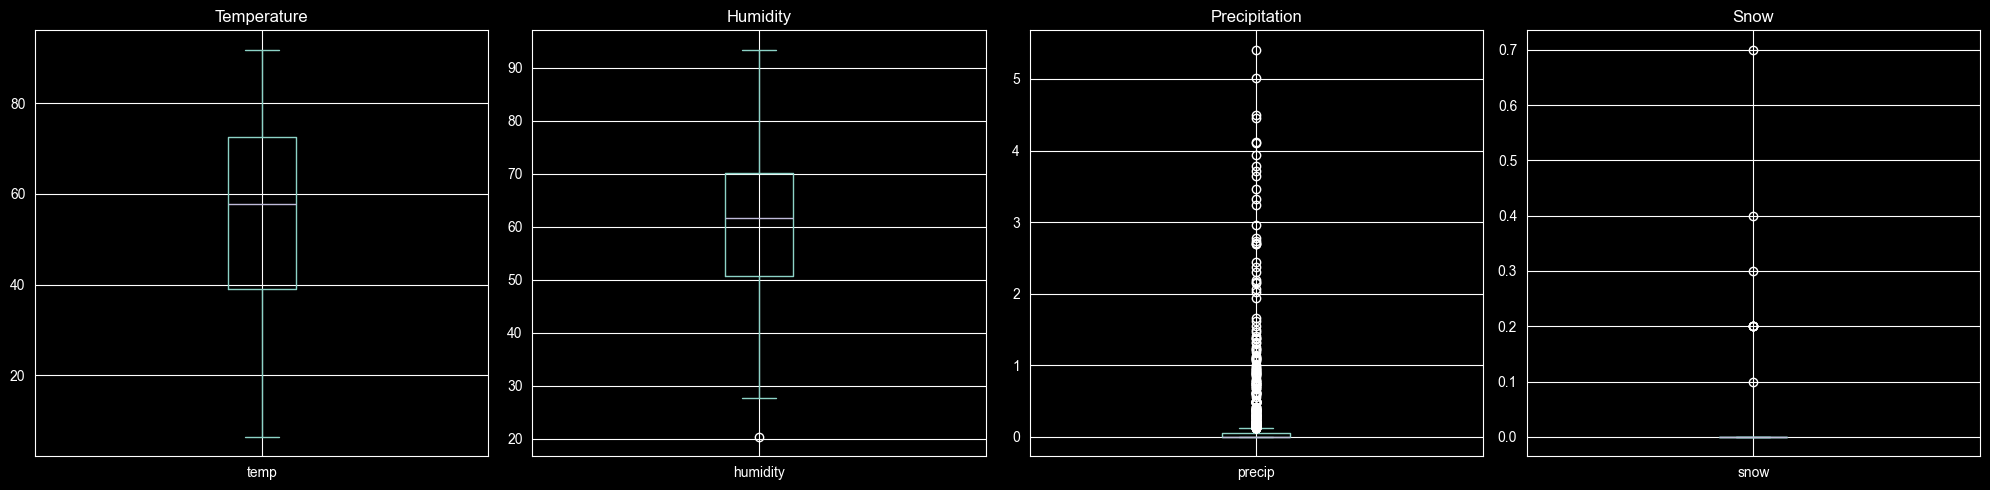

In [5]:
# 컬럼별 결측치 확인
print("[컬럼별 결측치 확인]")
print(weather_df.isna().sum())

# 날짜 중복 확인
print(f"\n중복된 날짜 수: {weather_df.duplicated(['year', 'month', 'date']).sum()}")

# 4개 항목(기온, 습도, 강수량, 적설량) 이상치 한 번에 확인
plt.figure(figsize=(20, 5)) # 가로로 길게 설정

# 1. 기온 (Temperature)
plt.subplot(1, 4, 1)
weather_df['temp'].plot(kind='box', title='Temperature')

# 2. 습도 (Humidity)
plt.subplot(1, 4, 2)
weather_df['humidity'].plot(kind='box', title='Humidity')

# 3. 강수량 (Precipitation)
plt.subplot(1, 4, 3)
weather_df['precip'].plot(kind='box', title='Precipitation')

# 4. 적설량 (Snow)
plt.subplot(1, 4, 4)
weather_df['snow'].plot(kind='box', title='Snow')

plt.tight_layout() # 그래프 간 간격 자동 조절
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler

# 스케일링 적용
scaler = MinMaxScaler()
num_cols = ['temp', 'humidity', 'precip', 'snow']

# 선택한 컬럼들만 0~1 사이로 변환하여 기존 컬럼에 덮어씌움
weather_df[num_cols] = scaler.fit_transform(weather_df[num_cols])

# 결과 확인
display(weather_df.head())

,year,month,date,temp,humidity,precip,snow,windspeed,winddir,sealevelpressure,visibility,solarradiation,conditions
0,2017,1,1,0.357143,0.707250,0.000000,0.0,5.8,131.6,1028.1,2.6,89.6,Partially cloudy
1,2017,1,2,0.412178,0.729138,0.002219,0.0,9.3,252.4,1022.6,1.8,83.1,"Rain, Partially cloudy"
2,2017,1,3,0.329040,0.592339,0.000000,0.0,10.1,283.9,1024.1,4.3,120.7,Clear
3,2017,1,4,0.361827,0.544460,0.000000,0.0,10.2,318.0,1023.8,5.6,119.9,Partially cloudy
4,2017,1,5,0.370023,0.454172,0.000000,0.0,12.6,59.1,1027.0,7.1,69.9,Partially cloudy


In [7]:
# 1. 기온 (temp): Cold(추움), Mild(적당함), Hot(더움)
weather_df['temp_level'] = pd.cut(weather_df['temp'],
                                 bins=[0, 0.3, 0.7, 1.0],
                                 labels=['Cold', 'Mild', 'Hot'], include_lowest=True)

# 2. 습도 (humidity): Dry(건조), Normal(쾌적), Humid(습함)
weather_df['humidity_level'] = pd.cut(weather_df['humidity'],
                                     bins=[0, 0.4, 0.7, 1.0],
                                     labels=['Dry', 'Normal', 'Humid'], include_lowest=True)

# 3. 강수량 (precip): None(안옴), Weak(약함), Strong(강함)
# 강수량은 0인 데이터가 많으므로 0~0.01 구간을 '안옴'으로 설정
weather_df['precip_level'] = pd.cut(weather_df['precip'],
                                   bins=[0, 0.01, 0.5, 1.0],
                                   labels=['None', 'Weak', 'Strong'], include_lowest=True)

# 4. 적설량 (snow): None(안옴), Weak(약함), Strong(강함)
weather_df['snow_level'] = pd.cut(weather_df['snow'],
                                 bins=[0, 0.01, 0.5, 1.0],
                                 labels=['None', 'Weak', 'Strong'], include_lowest=True)

# 결과 확인 (스케일링된 숫자와 라벨을 같이 비교)
cols_to_show = ['temp', 'temp_level', 'humidity', 'humidity_level',
                'precip', 'precip_level', 'snow', 'snow_level']
display(weather_df[cols_to_show].head(10))

,temp,temp_level,humidity,humidity_level,precip,precip_level,snow,snow_level
0,0.357143,Mild,0.707250,Humid,0.000000,None,0.0,None
1,0.412178,Mild,0.729138,Humid,0.002219,None,0.0,None
2,0.329040,Mild,0.592339,Normal,0.000000,None,0.0,None
3,0.361827,Mild,0.544460,Normal,0.000000,None,0.0,None
4,0.370023,Mild,0.454172,Normal,0.000000,None,0.0,None
5,0.414520,Mild,0.466484,Normal,0.000000,None,0.0,None
6,0.367681,Mild,0.671683,Normal,0.000000,None,0.0,None
7,0.420375,Mild,0.580027,Normal,0.000000,None,0.0,None
8,0.347775,Mild,0.512996,Normal,0.000000,None,0.0,None
9,0.233021,Cold,0.352941,Dry,0.000000,None,0.0,None
